In [ ]:
from google.colab import files
uploaded = files.upload()

Saving insurance.csv to insurance.csv


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [ ]:
df = df.dropna()

In [ ]:
df['sex'] = df['sex'].str.lower().str.strip()
df['smoker'] = df['smoker'].str.lower().str.strip()

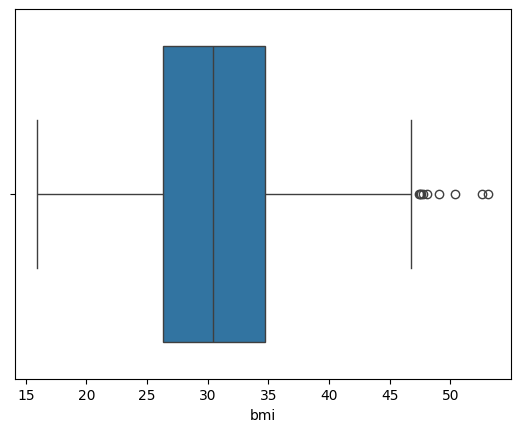

In [ ]:
sns.boxplot(x=df['bmi'])
q_low = df['bmi'].quantile(0.01)
q_high = df['bmi'].quantile(0.99)
df = df[(df['bmi'] >= q_low) & (df['bmi'] <= q_high)]

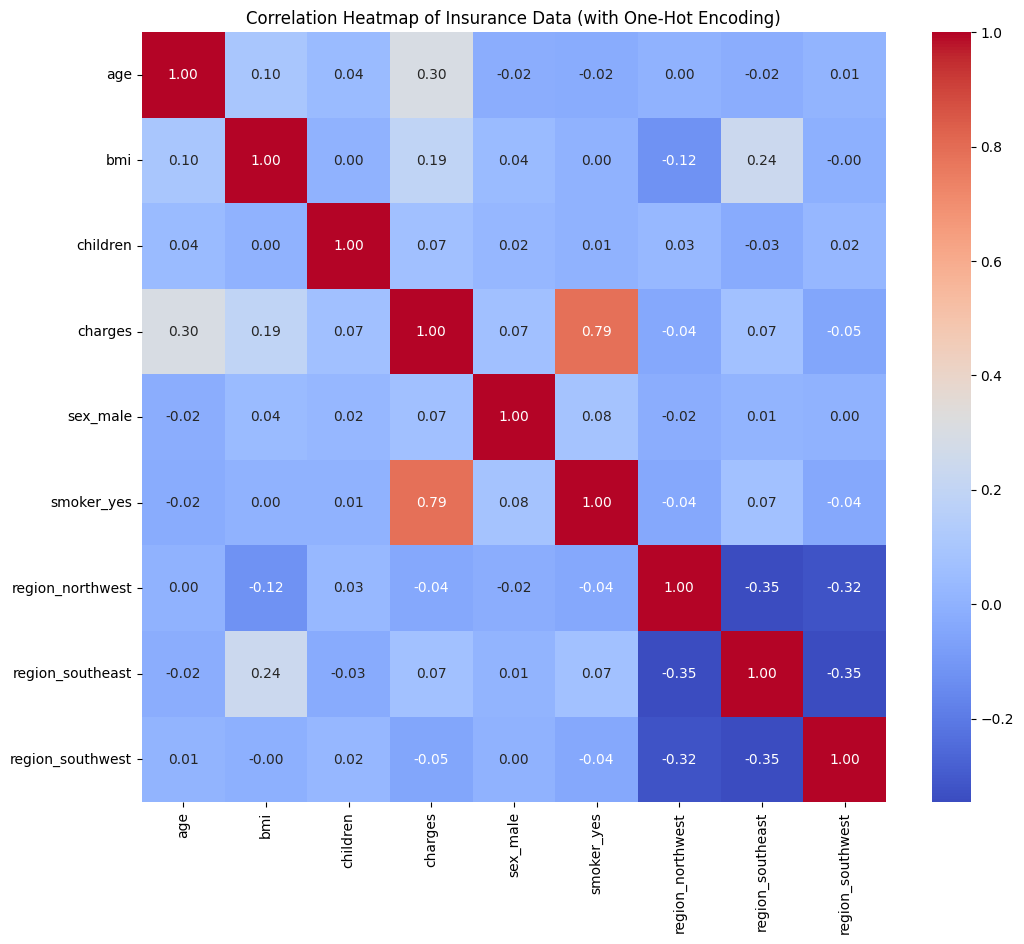

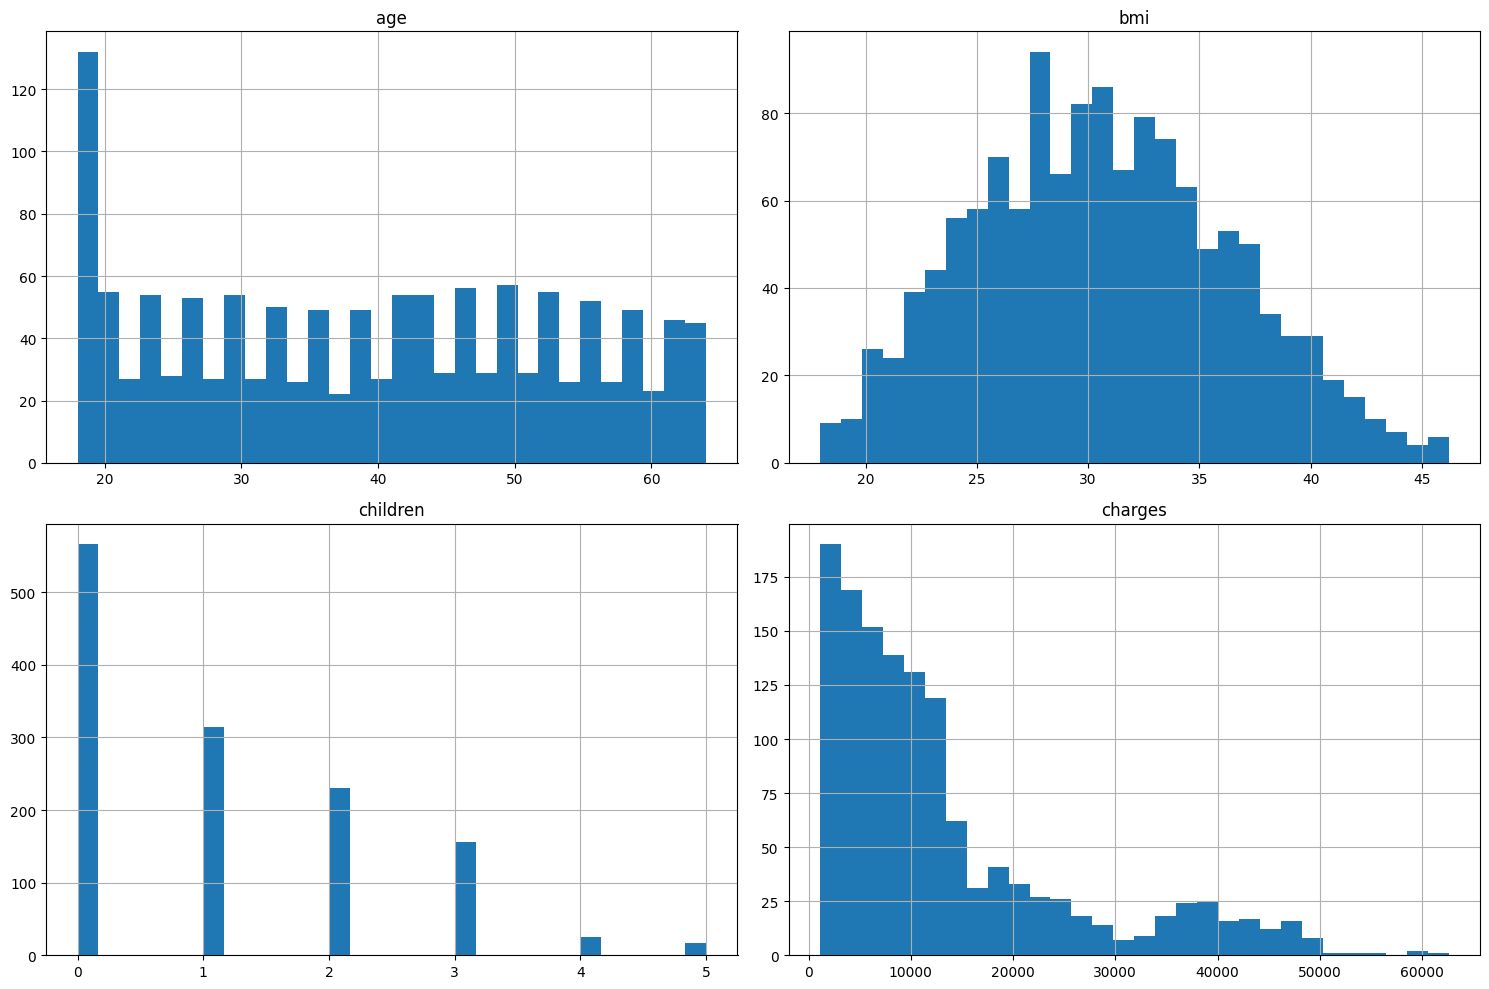

In [ ]:
df_encoded = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)
plt.figure(figsize=(12, 10))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Insurance Data (with One-Hot Encoding)')
plt.show()
df_encoded.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

In [ ]:
df = pd.get_dummies(df, drop_first=True)

In [ ]:
X = df.drop('charges', axis=1)
y = df['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("R² Score:", r2_score(y_test, y_pred))

R² Score: 0.7584540850092496


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
raw_df = pd.read_csv('insurance.csv')
raw_df_encoded = pd.get_dummies(raw_df, drop_first=True)
X_raw = raw_df_encoded.drop('charges', axis=1)
y_raw = raw_df_encoded['charges']
X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(X_raw, y_raw, test_size=0.2, random_state=42)
model_raw = LinearRegression()
model_raw.fit(X_train_raw, y_train_raw)
y_pred_raw = model_raw.predict(X_test_raw)
r2_before = r2_score(y_test_raw, y_pred_raw)
print("R² Score BEFORE cleaning:", r2_before)

R² Score BEFORE cleaning: 0.7835929767120724


In [ ]:
df_cleaned_encoded = pd.get_dummies(df, drop_first=True)
X_clean = df_cleaned_encoded.drop('charges', axis=1)
y_clean = df_cleaned_encoded['charges']
X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42)
model_clean = LinearRegression()
model_clean.fit(X_train_clean, y_train_clean)
y_pred_clean = model_clean.predict(X_test_clean)
r2_after = r2_score(y_test_clean, y_pred_clean)
print("R² Score AFTER cleaning:", r2_after)

R² Score AFTER cleaning: 0.7584540850092496


In [ ]:
print(f"R² Score BEFORE cleaning: {r2_before:.4f}")
print(f"R² Score AFTER cleaning: {r2_after:.4f}")

R² Score BEFORE cleaning: 0.7836
R² Score AFTER cleaning: 0.7585
